# Initi with Non-Zero Constant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Deep Learning 100 days\Day_15_weight_initilization_technuqie(not_to_do(\ushape.csv",header=None)

In [3]:
df.columns = ['X', 'Y', 'class']

In [4]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


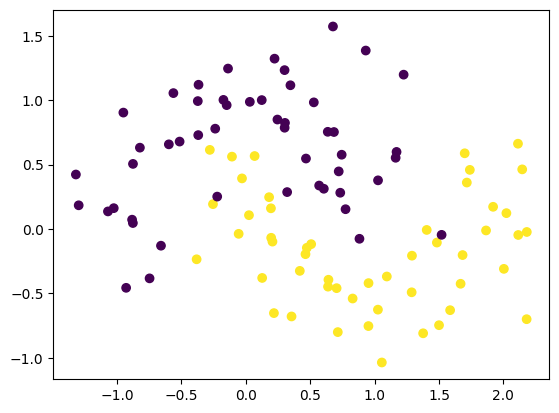

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Set parameters to 0
model.get_weights()

[array([[1.0880164 , 0.38542295],
        [1.215629  , 0.36898446]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0293288],
        [ 0.6887418]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [14]:
#all weights and bias are 0.5

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.4648 - loss: 0.9855 - val_accuracy: 0.5000 - val_loss: 0.8207
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4766 - loss: 0.9635 - val_accuracy: 0.5000 - val_loss: 0.8179
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5273 - loss: 0.8815 - val_accuracy: 0.5000 - val_loss: 0.8152
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4961 - loss: 0.9300 - val_accuracy: 0.5000 - val_loss: 0.8125
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4883 - loss: 0.9540 - val_accuracy: 0.5000 - val_loss: 0.8098
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4805 - loss: 0.9409 - val_accuracy: 0.5000 - val_loss: 0.8070
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5039 - loss: 0.9043 - val_accuracy: 0.5000 - val_loss: 0.8043
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4688 - loss: 0.9356 - val_accuracy: 0.5000 - val_los

In [17]:
model.get_weights()

[array([[0.5322524 , 0.5322524 ],
        [0.25195676, 0.25195676]], dtype=float32),
 array([0.30520418, 0.30520418], dtype=float32),
 array([[0.28903612],
        [0.28903612]], dtype=float32),
 array([0.25493193], dtype=float32)]

In [18]:
#can see above ek input se nikalne wale sab weight ek jaise hai

#if want to check for tanh -----> just change relu to tanh

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step


<Axes: >

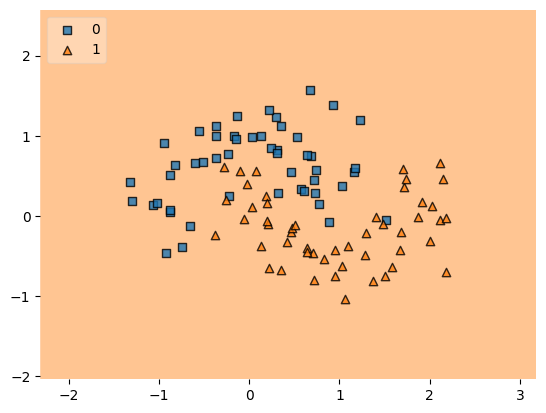

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [20]:
#and behaving line linear model
